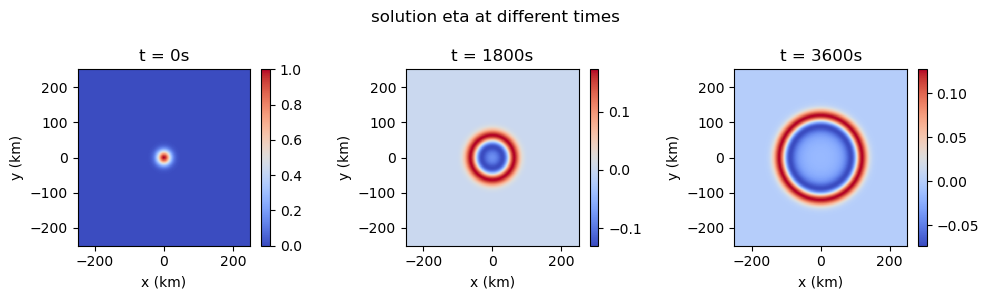

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import  fftshift,fft2, ifft2, ifftshift

# Constants
h = 100
g = 9.81
a_x = 20e3
a_y = 20e3
m_val = 2

# Domain
x_vals = np.linspace(-250e3, 250e3, 501)
y_vals = np.linspace(-250e3, 250e3, 501)
X_vals, Y_vals = np.meshgrid(x_vals, y_vals)

# Initial condition
f_vals = np.exp(-(X_vals / a_x) ** m_val) * np.exp(-(Y_vals / a_y) ** m_val)


k_vals = 2 * np.pi * fftshift(np.fft.fftfreq(len(x_vals), x_vals[1] - x_vals[0]))
l_vals = 2 * np.pi * fftshift(np.fft.fftfreq(len(y_vals), y_vals[1] - y_vals[0]))
K_vals, L_vals = np.meshgrid(k_vals, l_vals)
omega_vals = np.sqrt(g * h * (K_vals ** 2 + L_vals ** 2))
f_vals = fftshift(fft2(f_vals))

def eta_solution(t_val):
    # Compute the solution in the frequency domain at time t_val
    Eta_kl_vals = f_vals * np.cos(omega_vals * t_val)

    # Compute the inverse 2D FFT to obtain the solution in the spatial domain
    return np.real(ifft2(ifftshift(Eta_kl_vals)))


# Plot
fig = plt.figure(figsize=(10, 3))


time_vals = [0, 1800, 3600]
for i, t_val in enumerate(time_vals):
    eta_vals = eta_solution(t_val)
    ax_vals = fig.add_subplot(1, 3, i + 1)
    cb_vals = ax_vals.pcolormesh(X_vals / 1e3, Y_vals / 1e3, eta_vals, cmap='coolwarm')
    ax_vals.set_title(f't = {t_val}s')
    ax_vals.set_xlabel('x (km)')
    ax_vals.set_ylabel('y (km)')
    fig.colorbar(cb_vals, ax=ax_vals)

plt.suptitle('solution eta at different times')
plt.tight_layout()
plt.show()
